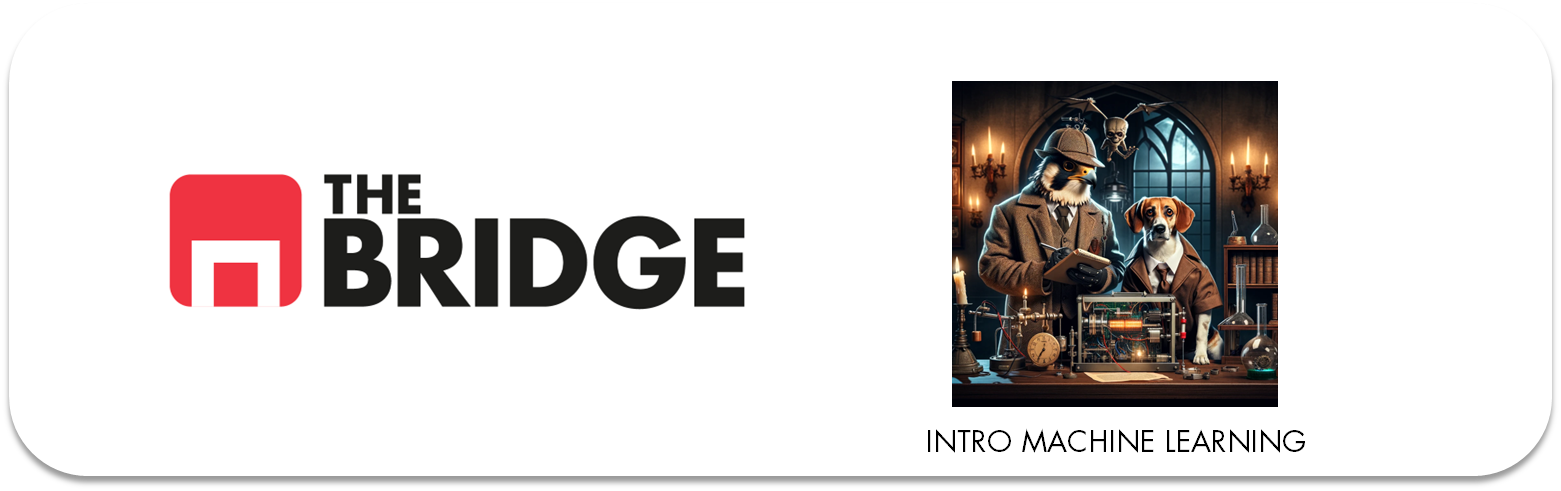

*NOTA: [Adaptado de "Hands-On Machine Learning with Scikit-Learn, Kera, and Tensorflow" de Aurelien Geron]*

## ML INTRO PRACTICA (V): Modelado

In [ ]:
# Recuperemos lo hecho en la sesión anterior

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


df_inmo = pd.read_csv("./data/ejemplo_housing.csv")

train_set, test_set = train_test_split(df_inmo, test_size=0.2, random_state=42)

train_set["income_cat"] = pd.cut(train_set["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

train_set["rooms_per_house"] = train_set["total_rooms"] / train_set["households"]
train_set["bedrooms_ratio"] = train_set["total_bedrooms"] / train_set["total_rooms"]



target = "median_house_value"

# Procesado de variables categóricas
train_set = pd.get_dummies(train_set, columns = ["ocean_proximity"], dtype = int)

# Procesado de variables numéricas
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
for col in ["rooms_per_house","total_rooms","bedrooms_ratio"]:
    train_set[f"log_{col}"] = train_set[col].apply(np.log)
    train_set[col] = min_max_scaler.fit_transform(train_set[[f"log_{col}"]])

train_set["housing_median_age"] = min_max_scaler.fit_transform(train_set[["housing_median_age"]])


# Features finales
features = ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', "income_cat", "rooms_per_house","total_rooms","housing_median_age","bedrooms_ratio"]


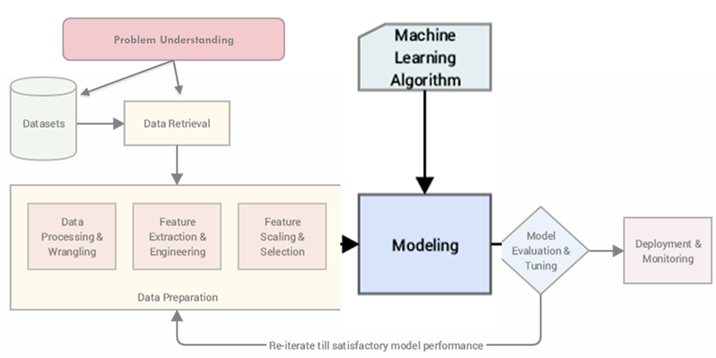

Una vez con el dataset de train preparado es hora de escoger algoritmos que se ajusten al problema que tenemos, que recordemos es de regresión. Además, en general, no escogeremos un único algoritmo sino varios para poder encontrar el que mejor se adapte a las características concretas de nuestro problema.  

Aunque lo hemos mencionado en la parte de evaluación que veremos en la siguiente sesión, este también es un buen momento para escoger una métrica de comparación y un sistema de validación de cuál de los modelos es mejor.

### 1. Métrica de Evaluación

Dedicaremos su sesión particular a las métricas, en este caso vamos a escoger como métrica una clásica en los problemas de regresión que: El error cuadrático medio o MSE (Mean Squared Error). Que se calcula como:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


Donde $y_i$ es el valor real de cada zona inspeccionada (en este ejemplo, es decir de cada instancia o fila del datset), $\hat y_i$ es el valor que da el modelo y n el número de instancias que se han evaluado por el modelo.

Utilizaremos la función que nos proporciona sklearn:

In [ ]:
from sklearn.metrics import mean_squared_error

### 2. Sistema de validación/compración: Cross-Validation

El sitema que vamos a emplear para comparar los modelos creados con los algoritmos escogidos se denomina "validación cruzada" o cross-validation. Este es un método, que iremos viendo repetidas veces, y que es especialmente útil para comparar modelos y para evitar el problema del sobreajuste u overfitting [que veremos en la sesión en vivo]. Ahora mismo no hace falta que entremos en detalles. Lo veremos al comparar los dos modelos escogidos.

### 3. Algoritmos o técnicas escogidas

Aquí vamos a dar un salto de fe y vamos a escoger "Regresión Lineal" y "Arboles de Decisión para Regresión". No le des vueltas, cada uno tendrás su unidad particular. Simplemente mira como se crean los modelos:

In [ ]:
# Regresor Lineal

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Arboles de decisión para Regresión 
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42) # Necesita una inicialización aleatoria y la semilla permite que siempre sea la misma

### 4. Entrenando los modelos

In [ ]:
# primero separamos la variable target del dataset de train y además solo nos quedamos con las features:


X = train_set[features].copy()
y= train_set[target]

Y ahora entrenamos/creamos el modelo para cada algoritmo:

In [ ]:
lin_reg.fit(X,y)
tree_reg.fit(X,y)

### 5. Primera evaluación: Evaluación contra los propios datos de entrenamiento

Aunque la fase de evaluación la contemplamos en la siguiente sesión, podemos hacer una primera evaluación sobre los mismos datos de entrenamiento. Es decir, generamos las predicciones que haría el modelo para los datos con los que ha entrenado y las comparamos con los datos reales. 

Vamos a calcular el MSE de train:

In [ ]:
# Primero las predicciones
train_pred_lin = lin_reg.predict(X)

train_pred_tree = tree_reg.predict(X)

In [ ]:
train_pred_lin

Y ahora MSE:

In [ ]:
mse_lin = mean_squared_error(y, train_pred_lin, squared=False) # En realidad damos la raíz cuadrada del error cuadrático medio
# que está en las mismas unidades que el target
print(mse_lin)

In [ ]:
mse_tree = mean_squared_error(y, train_pred_tree, squared= False)
print(mse_tree)

Uauhhh, el regresor de árboles lo clava!!!! Ya está tenemos un modelo perfecto... ¿o no? Lo veremos en la siguiente sesión.

